<a href="https://colab.research.google.com/github/epicskills1/PRODIGY_ML_02/blob/main/CustomerSegmentationusingKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


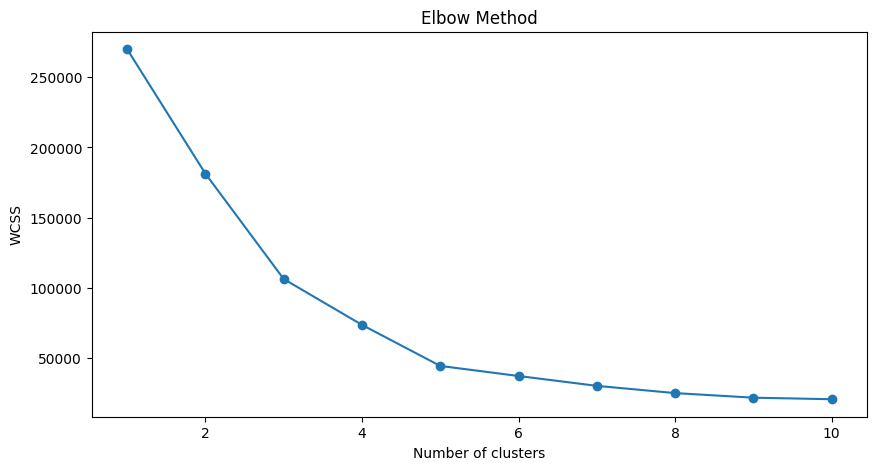

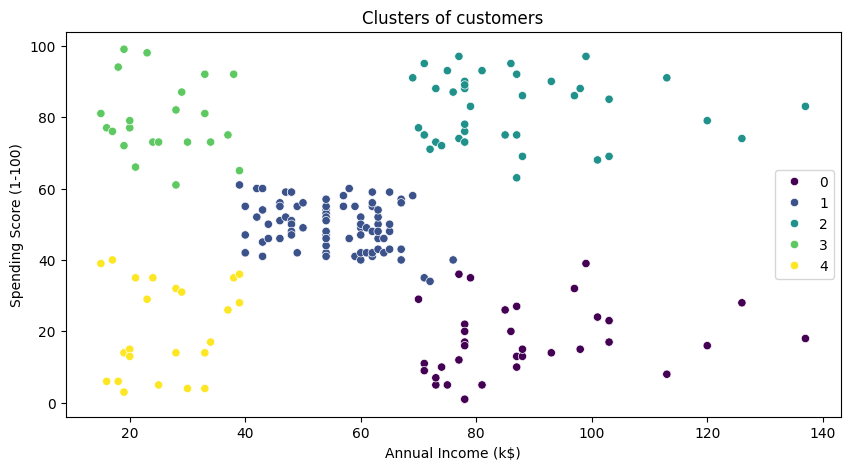

In [1]:
# Google Colab implementation

# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Data preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means to the dataset with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster column to the original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [6]:
# Install required packages
!pip install streamlit pyngrok




In [7]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Title of the Streamlit app
st.title("Customer Segmentation using K-means Clustering")

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Data preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
st.pyplot(plt)

# Fit K-means to the dataset with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster column to the original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
st.pyplot(plt)



Writing app.py


In [8]:
!pip install --upgrade pyngrok

from pyngrok import ngrok
ngrok.set_auth_token("2N13huDP2ANtbXSJQ7OQ2HvAShU_2pEtgBSQ4CM4B6mY6kTEF") # Removed extra space before this line

# Terminate all existing ngrok tunnels
ngrok.kill()

# Create a new ngrok tunnel, explicitly specifying HTTP protocol
public_url = ngrok.connect(8501, proto="http") # Specify protocol as "http"
print(f"Streamlit App URL: {public_url}")

Streamlit App URL: NgrokTunnel: "https://38de-34-48-74-174.ngrok-free.app" -> "http://localhost:8501"


In [9]:
import subprocess

# Run Streamlit app
subprocess.Popen(['streamlit', 'run', 'app.py'])

<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>